In [ ]:
!pip install basemap
!pip install basemap-data-hires
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.9 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 6.4 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nz_lats = [-34.25, -36.75, -37.25, -37.75, -38.75, -40.75, -41.25, -43.75, -43.75, -44.25, -45.75, -47.25]
nz_lons = [172.25, 175.25, 176.75, 174.75, 174.25, 174.25, 176.25, 183.25, 173.25, 167.25, 170.75, 167.75]
nz_locs = ['Cape Reinga', 'Hauraki Gulf', 'Bay of Plenty', 'Raglan', 'Taranaki', 'Cook Strait', 'Wairarapa', 
           'Chatham Island', 'Bank Peninsula', 'Fiordland', 'Otago Peninsula', 'Stewart Island']
nz_sstas = ['1, 2, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '2, 3, 6', '1, 2, 3, 6', '2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6']
nz_mhws = ['1', 'NA', '2, 3', 'NA', '1, 2', '3, 6', '1, 6', '1, 2, 3', '2, 6', '1, 2, 3', '1, 2, 3, 6', '1, 2, 3, 6']
nz_smhws = ['1, 6', '1, 2', '1, 6', '6', '1, 2', '3, 6', '1, 2', '1, 2, 3, 6', '1, 2, 6', '1, 2, 3', '1, 2, 3, 6', '1, 2, 3, 6']
nz_right = [False, False, True, True, False, False, True, True, True, False, True, True]

non_nz_lats = [-29.25, -36.25, -38.25, -40.25, -33.75, -33.75, -35.25, -35.25]
non_nz_lons = [155.75, 152.75, 150.75, 150.75, 203.25, 200.25, 207.25, 204.25] 
non_nz_locs = ['EAC A', 'EAC B', 'EAC C', 'EAC D', 'CP A', 'CP B', 'CP C', 'CP D']

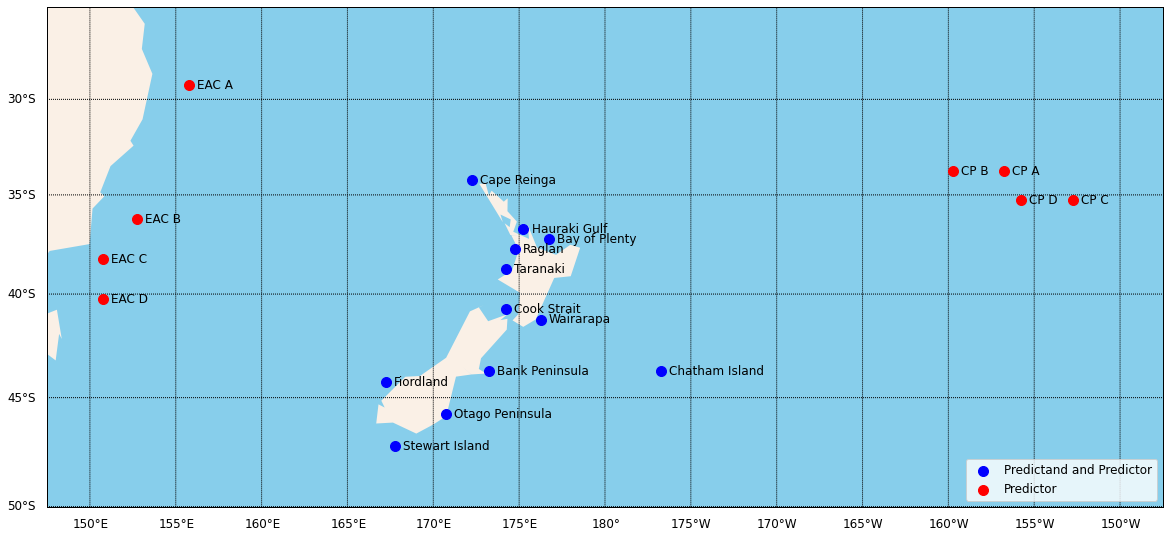

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
m = Basemap(projection='mill', lon_0=180,
            llcrnrlon=147.5, llcrnrlat=-50, urcrnrlon=212.5, urcrnrlat=-25)

#m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 5), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(0, 360, 5), labels=[0, 0, 0, 1], fontsize=12)
m.drawmapboundary(fill_color='skyblue')
m.fillcontinents(color='linen', lake_color='skyblue')

sc1 = plt.scatter([], [], s=100, marker='o', color='blue')
sc2 = plt.scatter([], [], s=100, marker='o', color='red')

for lat, lon, loc in zip(nz_lats, nz_lons, nz_locs):
    x, y = m(lon, lat)
    plt.plot(x, y, 'bo', markersize=10)
    plt.text(x + 52500, y, loc, fontsize=12, color='black', ha='left', va='center')

for lat, lon, loc in zip(non_nz_lats, non_nz_lons, non_nz_locs):
    x, y = m(lon, lat)
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x + 52500, y, loc, fontsize=12, color='black', ha='left', va='center')

plt.legend([sc1, sc2], ['Predictand and Predictor', 'Predictor'], loc='lower right', fontsize=12)

plt.show()

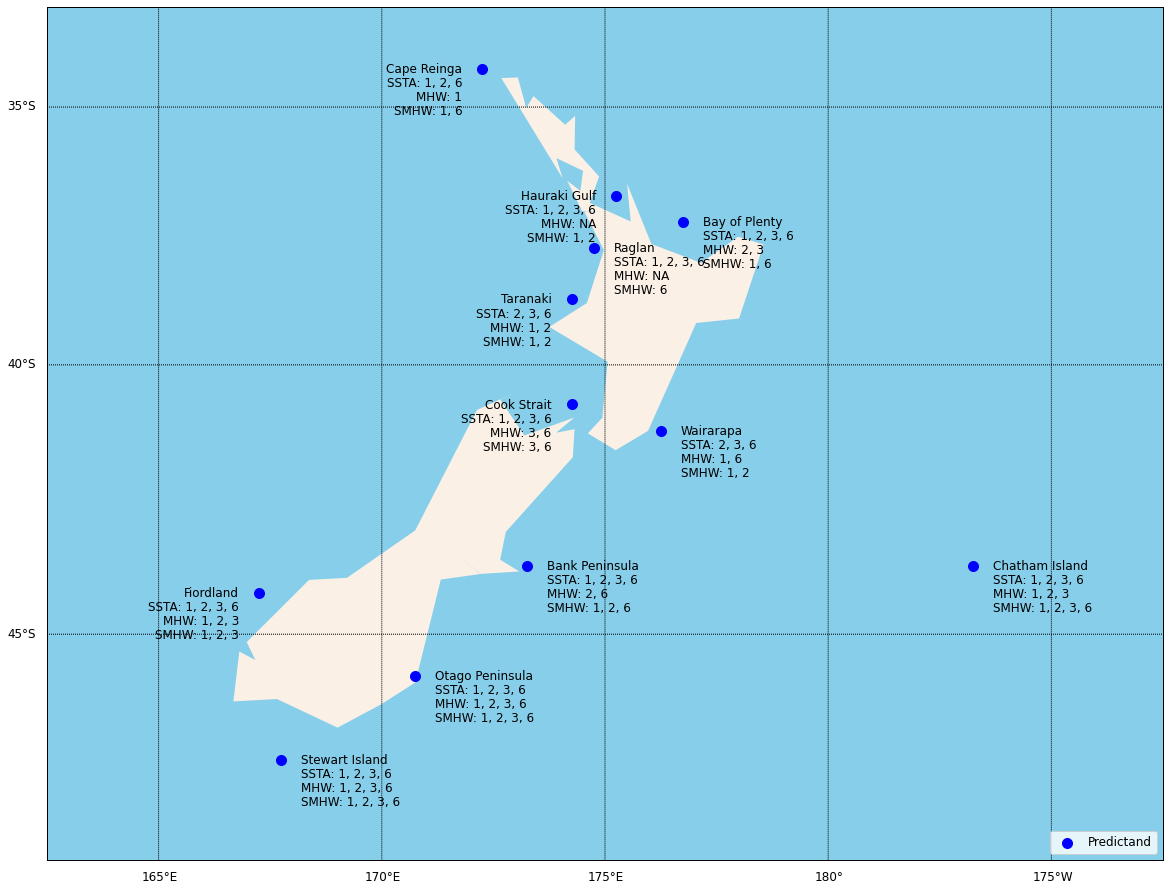

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
m = Basemap(projection='mill', lon_0=180,
            llcrnrlon=162.5, llcrnrlat=-49, urcrnrlon=187.5, urcrnrlat=-33)

#m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 5), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(0, 360, 5), labels=[0, 0, 0, 1], fontsize=12)
m.drawmapboundary(fill_color='skyblue')
m.fillcontinents(color='linen', lake_color='skyblue')

sc1 = plt.scatter([], [], s=100, marker='o', color='blue')

for lat, lon, loc, ssta, mhw, smhw, right in zip(nz_lats, nz_lons, nz_locs, nz_sstas, nz_mhws, nz_smhws, nz_right):
    if right:
        x, y = m(lon, lat)
        plt.plot(x, y, 'bo', markersize=10)
        plt.text(x + 50000, y , loc, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 35000, 'SSTA: ' + ssta, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 70000, 'MHW: ' + mhw, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 105000, 'SMHW: ' + smhw, fontsize=12, color='black', ha='left', va='center')
    else:
        x, y = m(lon, lat)
        plt.plot(x, y, 'bo', markersize=10)
        plt.text(x - 50000, y , loc, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 35000, 'SSTA: ' + ssta, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 70000, 'MHW: ' + mhw, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 105000, 'SMHW: ' + smhw, fontsize=12, color='black', ha='right', va='center')

plt.legend([sc1], ['Predictand'], loc='lower right', fontsize=12)

plt.show()

In [5]:
import pandas as pd

mse_rank = [['Bay of Plenty', 5, 3, 4, 8, 2, 1, 9, 6, 7, 10],
            ['Bank Peninsula', 6, 3, 4, 5, 1, 2, 9, 7, 8, 10],
            ['Chatham Island', 6, 3, 1, 9, 4, 2, 8, 5, 7, 10],
            ['Cape Reinga', 5, 2, 4, 7, 3, 1, 9, 6, 8, 10],
            ['Cook Strait', 4, 2, 5, 9, 1, 3, 7, 6, 8, 10],
            ['Fiordland', 5, 3, 4, 8, 2, 1, 7, 6, 9, 10],
            ['Hauraki Gulf', 5, 2, 4, 8, 3, 1, 9, 6, 7, 10],
            ['Otago Peninsula', 5, 1.5, 3, 6, 4, 1.5, 9, 7, 8, 10],
            ['Raglan', 5, 3, 4, 9, 2, 1, 8, 6, 7, 10],
            ['Stewart Island', 5, 2, 4, 7, 3, 1, 9, 6, 8, 10],
            ['Taranaki', 1, 5, 2.5, 9, 4, 2.5, 7, 6, 8, 10],
            ['Wairarapa', 1, 5, 2, 9, 4, 6, 8, 3, 7, 10],
            ['Average', 4.4167, 2.875, 3.4583, 7.8333, 2.75, 1.9167, 8.25, 5.8333, 7.6667, 10]]
mse_rank = pd.DataFrame(mse_rank, columns=['Location', 'Persistence', 'MSE', 'MAE', 'Huber', 'WMSE', 'FR', 'BMSE', 'SWMSE1', 'SWMSE2', 'SWMSE3'])

csi_rank = [['Bay of Plenty', 1, 9, 9, 6, 9, 7, 4, 2, 3, 5],
        ['Bank Peninsula', 2, 5.5, 10, 9, 7, 5.5, 3, 4, 8, 1],
        ['Chatham Island', 4, 8, 10, 1, 8, 8, 6, 3, 2, 5],
        ['Cape Reinga', 2, 7.5, 9, 6, 7.5, 10, 1, 4, 3, 5],
        ['Cook Strait', 1, 7.5, 9, 6, 7.5, 10, 2, 3, 4, 5],
        ['Fiordland', 8, 6.5, 9, 10, 5, 6.5, 1, 3, 2, 4],
        ['Hauraki Gulf', 1, 9, 10, 6, 7.5, 7.5, 4, 2, 3, 5],
        ['Otago Peninsula', 9, 1.5, 7.5, 10, 3, 1.5, 6, 4, 5, 7.5],
        ['Raglan', 1, 7.5, 10, 9, 7.5, 6, 2, 5, 3, 4],
        ['Stewart Island', 6, 7.5, 9, 1, 7.5, 5, 4, 2, 3, 10],
        ['Taranaki', 3, 7.5, 10, 9, 7.5, 6, 1, 4, 2, 5],
        ['Wairarapa', 2, 9.5, 6, 7, 8, 9.5, 1, 3, 4, 5],
        ['Average', 3.3333, 7.2083, 9.0417, 6.6667, 7.0833, 6.875, 2.9167, 3.25, 3.5, 5.125]]
csi_rank = pd.DataFrame(csi_rank, columns=['Location', 'Persistence', 'MSE', 'MAE', 'Huber', 'WMSE', 'FR', 'BMSE', 'SWMSE1', 'SWMSE2', 'SWMSE3'])

csi_80_rank = [['Bay of Plenty', 4, 8, 5, 10, 6, 7, 3, 2, 1, 9],
    ['Bank Peninsula', 5, 7.5, 10, 9, 7.5, 4, 2, 3, 1, 6],
    ['Chatham Island', 4, 7.5, 6, 10, 9, 7.5, 1, 5, 3, 2],
    ['Cape Reinga', 2, 8, 3, 6, 7, 10, 1, 5, 4, 9],
    ['Cook Strait', 1, 6, 2, 9, 3, 4, 7, 10, 8, 5],
    ['Fiordland', 9, 4, 6, 10, 4, 4, 7.5, 2, 1, 7.5],
    ['Hauraki Gulf', 9, 5.5, 4, 7, 8, 5.5, 1.5, 1.5, 3, 10],
    ['Otago Peninsula', 10, 4, 5, 6.5, 6.5, 8, 1.5, 3, 1.5, 9],
    ['Raglan', 1, 6, 4, 10, 2, 7, 8, 3, 5, 9],
    ['Stewart Island', 8, 8, 4, 10, 5, 8, 3, 1, 2, 6],
    ['Taranaki', 9, 5, 7, 10, 7, 7, 2, 1, 3, 4],
    ['Wairarapa', 2, 7, 6, 10, 9, 8, 1, 5, 3, 4],
    ['Average', 5.3333, 6.375, 5.1667, 8.9583, 6.1667, 6.6667, 3.2083, 3.4583, 2.9583, 6.7083]]
csi_80_rank = pd.DataFrame(csi_80_rank, columns=['Location', 'Persistence', 'MSE', 'MAE', 'Huber', 'WMSE', 'FR', 'BMSE', 'SWMSE1', 'SWMSE2', 'SWMSE3'])

In [7]:
mse_rank

,Location,Persistence,MSE,MAE,Huber,WMSE,FR,BMSE,SWMSE1,SWMSE2,SWMSE3
0,Bay of Plenty,5.0000,3.000,4.0000,8.0000,2.00,1.0000,9.00,6.0000,7.0000,10
1,Bank Peninsula,6.0000,3.000,4.0000,5.0000,1.00,2.0000,9.00,7.0000,8.0000,10
2,Chatham Island,6.0000,3.000,1.0000,9.0000,4.00,2.0000,8.00,5.0000,7.0000,10
3,Cape Reinga,5.0000,2.000,4.0000,7.0000,3.00,1.0000,9.00,6.0000,8.0000,10
4,Cook Strait,4.0000,2.000,5.0000,9.0000,1.00,3.0000,7.00,6.0000,8.0000,10
5,Fiordland,5.0000,3.000,4.0000,8.0000,2.00,1.0000,7.00,6.0000,9.0000,10
6,Hauraki Gulf,5.0000,2.000,4.0000,8.0000,3.00,1.0000,9.00,6.0000,7.0000,10
7,Otago Peninsula,5.0000,1.500,3.0000,6.0000,4.00,1.5000,9.00,7.0000,8.0000,10
8,Raglan,5.0000,3.000,4.0000,9.0000,2.00,1.0000,8.00,6.0000,7.0000,10
9,Stewart Island,5.0000,2.000,4.0000,7.0000,3.00,1.0000,9.00,6.0000,8.0000,10


In [8]:
csi_rank

,Location,Persistence,MSE,MAE,Huber,WMSE,FR,BMSE,SWMSE1,SWMSE2,SWMSE3
0,Bay of Plenty,1.0000,9.0000,9.0000,6.0000,9.0000,7.000,4.0000,2.00,3.0,5.000
1,Bank Peninsula,2.0000,5.5000,10.0000,9.0000,7.0000,5.500,3.0000,4.00,8.0,1.000
2,Chatham Island,4.0000,8.0000,10.0000,1.0000,8.0000,8.000,6.0000,3.00,2.0,5.000
3,Cape Reinga,2.0000,7.5000,9.0000,6.0000,7.5000,10.000,1.0000,4.00,3.0,5.000
4,Cook Strait,1.0000,7.5000,9.0000,6.0000,7.5000,10.000,2.0000,3.00,4.0,5.000
5,Fiordland,8.0000,6.5000,9.0000,10.0000,5.0000,6.500,1.0000,3.00,2.0,4.000
6,Hauraki Gulf,1.0000,9.0000,10.0000,6.0000,7.5000,7.500,4.0000,2.00,3.0,5.000
7,Otago Peninsula,9.0000,1.5000,7.5000,10.0000,3.0000,1.500,6.0000,4.00,5.0,7.500
8,Raglan,1.0000,7.5000,10.0000,9.0000,7.5000,6.000,2.0000,5.00,3.0,4.000
9,Stewart Island,6.0000,7.5000,9.0000,1.0000,7.5000,5.000,4.0000,2.00,3.0,10.000


In [9]:
csi_80_rank

,Location,Persistence,MSE,MAE,Huber,WMSE,FR,BMSE,SWMSE1,SWMSE2,SWMSE3
0,Bay of Plenty,4.0000,8.000,5.0000,10.0000,6.0000,7.0000,3.0000,2.0000,1.0000,9.0000
1,Bank Peninsula,5.0000,7.500,10.0000,9.0000,7.5000,4.0000,2.0000,3.0000,1.0000,6.0000
2,Chatham Island,4.0000,7.500,6.0000,10.0000,9.0000,7.5000,1.0000,5.0000,3.0000,2.0000
3,Cape Reinga,2.0000,8.000,3.0000,6.0000,7.0000,10.0000,1.0000,5.0000,4.0000,9.0000
4,Cook Strait,1.0000,6.000,2.0000,9.0000,3.0000,4.0000,7.0000,10.0000,8.0000,5.0000
5,Fiordland,9.0000,4.000,6.0000,10.0000,4.0000,4.0000,7.5000,2.0000,1.0000,7.5000
6,Hauraki Gulf,9.0000,5.500,4.0000,7.0000,8.0000,5.5000,1.5000,1.5000,3.0000,10.0000
7,Otago Peninsula,10.0000,4.000,5.0000,6.5000,6.5000,8.0000,1.5000,3.0000,1.5000,9.0000
8,Raglan,1.0000,6.000,4.0000,10.0000,2.0000,7.0000,8.0000,3.0000,5.0000,9.0000
9,Stewart Island,8.0000,8.000,4.0000,10.0000,5.0000,8.0000,3.0000,1.0000,2.0000,6.0000


In [18]:
# Friedman test

k = 10
N = 12

for df in [mse_rank, csi_rank, csi_80_rank]:

    last_row = df.iloc[-1].values
    sum_of_squares = (last_row[1:] ** 2).sum()

    chi_2 = (12 * N / (k * (k + 1))) * (sum_of_squares - (k * (k + 1) ** 2) / 4)
    F = ((N - 1) * chi_2) / (N * (k - 1) - chi_2)
    print(F)

# Search F(9, 99) = 1.9758. F > F(9, 99), reject the null-hypothesis.

65.89184661277868
11.292769367449166
6.973704918897749
